<a href="https://colab.research.google.com/github/sundarjhu/Galactic_Dynamics2021/blob/main/Galactic_Dynamics_Lecture12b_20210405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy
import astropy.units as u
!pip install -U --no-deps git+git://github.com/jobovy/galpy.git#egg=galpy
from galpy.util import plot as galpy_plot
galpy_plot.start_print(axes_labelsize=17.,text_fontsize=12., xtick_labelsize=15.,ytick_labelsize=15.)
%pylab inline

#The following is necessary for LaTeX to cooperate with galpy's plotting routines
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! sudo apt install cm-super

  Cloning git://github.com/jobovy/galpy.git to /tmp/pip-install-t73l0_sf/galpy
  Running command git clone -q git://github.com/jobovy/galpy.git /tmp/pip-install-t73l0_sf/galpy
  Created wheel for galpy: filename=galpy-1.7.0.dev0-cp37-none-any.whl size=601766 sha256=5cc34c87ed7a083ab0a1d7cb7151e5f137f3b8038b7b4b9957221646845a44c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-4bsv2pu0/wheels/13/ec/bc/a8043c6ab080e5ff219e2be7cc9effc3ae37f604330a5bd2f2
Successfully built galpy
Populating the interactive namespace from numpy and matplotlib
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-lat

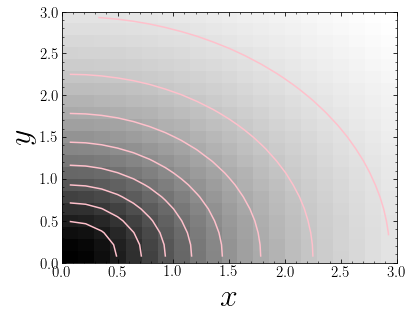

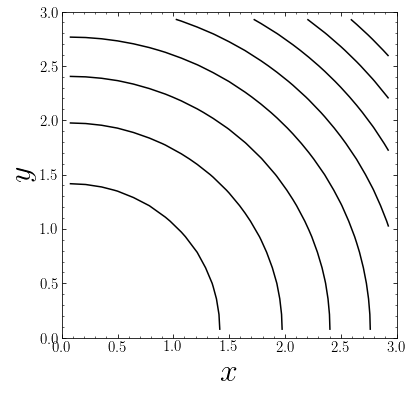

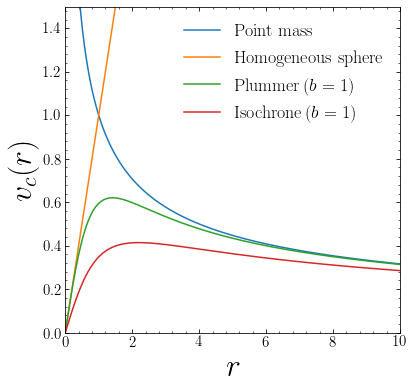

In [2]:
from galpy import potential
# Define each potential
kp = potential.KeplerPotential(amp = 1.)
hp = potential.HomogeneousSpherePotential(normalize = 1., R = 20.)
pp = potential.PlummerPotential(amp = 1., b = 1.)
ip = potential.IsochronePotential(amp = 1., b = 1.)
pots = [kp, hp, pp, ip]
#Plot the potentials for a couple of the above
figsize(6, 6)
pp.plot(rmin = 0.0, rmax = 3.0, zmin = 0.0, zmax = 3.0, xy = True, ncontours = 10, cntrcolors = 'pink')
_ = xlabel(r'$x$', fontsize = 32); _ = ylabel(r'$y$', fontsize = 32) #overrides default values for galpy.potential.plot method
figsize(6, 6)
hp.plot(rmin = 0.0, rmax = 3.0, zmin = 0.0, zmax = 3.0, xy = True, justcontours = True, ncontours = 10)
axis(aspect = 'equal'); _ = xlabel(r'$x$', fontsize = 32); _ = ylabel(r'$y$', fontsize = 32) #overrides default values for galpy.potential.plot method
# Plot the rotation curve for each
line_kepler = potential.plotRotcurve(kp, Rrange = [0., 10.], label = r'$\mathrm{Point\ mass}$', yrange = [0., 1.5])
line_homog = potential.plotRotcurve(hp, Rrange = [0., 10.], label = r'$\mathrm{Homogeneous\ sphere}$', overplot = True)
line_plummer = potential.plotRotcurve(pp, Rrange = [0., 10.], label = r'$\mathrm{Plummer}\,(b=1)$', overplot = True)
line_isochrone = potential.plotRotcurve(ip, Rrange = [0., 10.], label = r'$\mathrm{Isochrone}\,(b=1)$', overplot = True)
legend(handles = [line_kepler[0], line_homog[0], line_plummer[0], line_isochrone[0]], fontsize = 18., loc = 'upper right', frameon = False);
_ = xlabel(r'$r$', fontsize = 32)
_ = ylabel(r'$v_c(r)$', fontsize = 32)


Specific energy: -0.55 Vo**2
Specific angular momentum: [ 0.  -0.   0.8] Ro * Vo


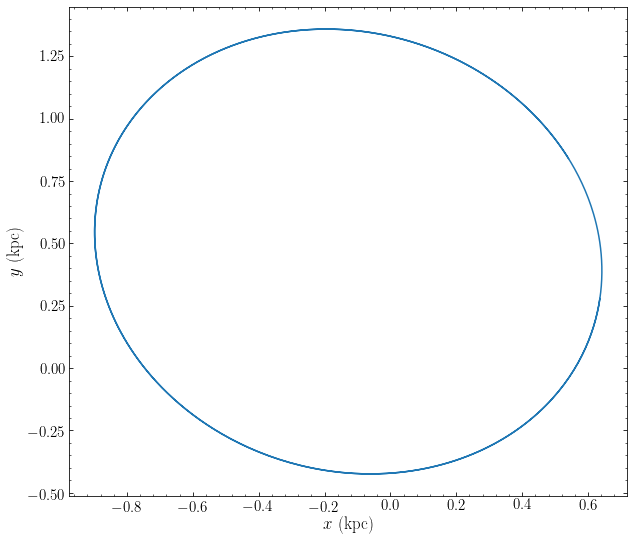

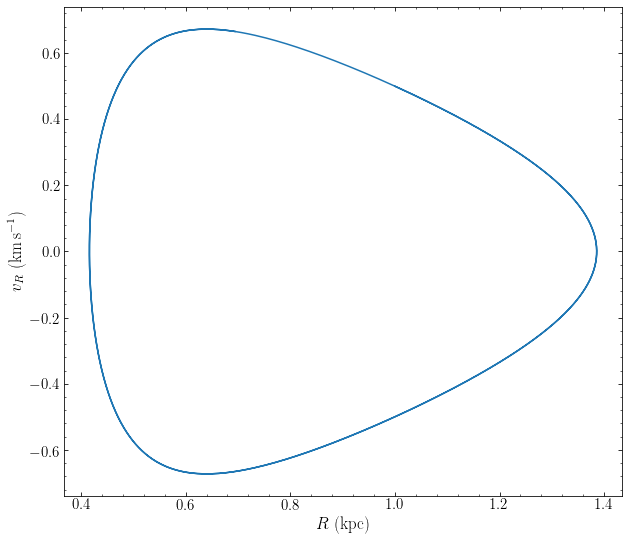

In [9]:
#Orbits in the homogeneous sphere
from galpy import potential
from galpy.orbit import Orbit
from astropy import units
# figsize(10, 6)
# hp = potential.HomogeneousSpherePotential(normalize = 1., R = 20.)
# oh = Orbit([1.0, 0.0, -1.0, 1.0]) #[x, y, vx, vy]
# ts = numpy.linspace(0., 2. * numpy.pi, 1001)
# oh.integrate(ts, hp)
# oh.plotx(yrange = [-1.65, 1.65], label = r'$x(t)$')
# oh.ploty(label = r'$y(t)$', overplot = True)
# legend(fontsize = 18., loc = 'upper right', frameon = False);
# _ = xlabel(r'$t$', fontsize = 32); _ = ylabel(r'$x(t),y(t)$', fontsize = 32) #override defaults
# #Plot R(t)
# oh.plotR(yrange = [0., 2.0])
# _ = xlabel(r'$t$', fontsize = 32); _ = ylabel(r'$R(t)$', fontsize = 32) #override defaults
# #Animate orbit
# oh.animate(d1 = ['x', 'R'], d2 = ['y', 'vR'])

figsize(10, 9)
kp = potential.KeplerPotential(normalize = False)
ts = np.linspace(0, 10., 1000) * units.Gyr #time steps in Gyr over which to integrate orbit
#Initial conditions vxvv = [R, vR, vT, z, vz, phi]. Impose vc = 220 km/s at R0 = 8 kpc.
op = Orbit([1.0, 0.5, 0.8, 0.0, 0.0, 1.0], ro = 1.0, vo = 1.0)
energy = op.E(pot = kp, vo = 1.0)
print("Specific energy: {} Vo**2".format(np.round(energy, decimals = 2)))
spangmom = op.L(pot = kp, ro = 1.0, vo = 1.0)
print("Specific angular momentum: {} Ro * Vo".format(np.round(spangmom, decimals = 2)))
eccentricity = op.e(pot = kp, analytic = True)
op.integrate(ts, kp, method = 'dopr54_c')
_ = op.plot(d1 = 'x', d2 = 'y'); _ = op.plot(d1 = 'R', d2 = 'vR')
#op.animate(d1 = ['x', 'R', 'R'], d2 = ['y', 'vT', 'vR'])

In [ ]:
#Surface of section
def surface_section(Rs, zs, vRs):
    # Find points where the orbit crosses z from - to +
    shiftzs = numpy.roll(zs, -1)
    indx = (zs[:-1] < 0.)*(shiftzs[:-1] > 0.)
    return (Rs[:-1][indx], vRs[:-1][indx])

#Try for a Keplerian potential first. Explain the resulting figure.
ts = np.linspace(0, 10., 1000) * units.Gyr #time steps in Gyr over which to integrate orbit
sect1Rs, sect1vRs = surface_section(op.R(ts), op.z(ts), op.vR(ts))
plot(sect1Rs, sect1vRs, '.', mec = 'none')
_ = xlabel(r'$\displaystyle{R\over R_{_0}}$')
_ = ylabel(r'$\displaystyle{v_{_R}\over v_{_0}}$')

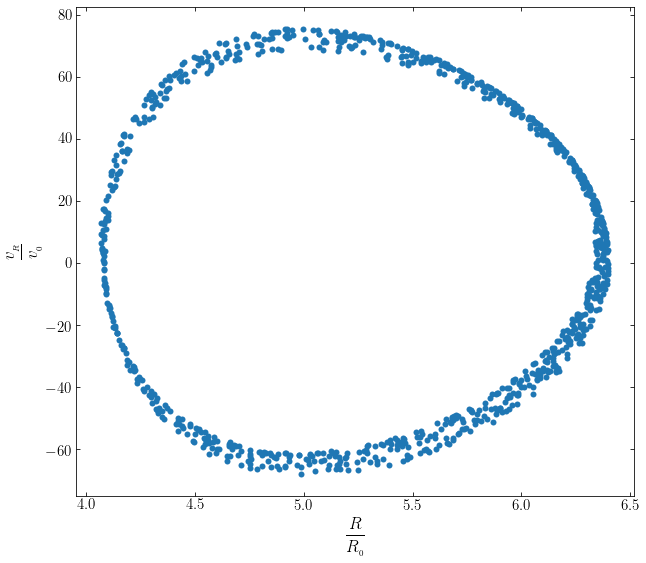

In [30]:
#The following initialises an orbit given the energy, angular momentum, and the initial
# values of R, and vR.
def orbit_RvRELz(R, vR, E, Lz, pot=None):
    """Returns Orbit at (R, vR, phi = 0, z = 0) with given (E, Lz)"""
    return Orbit([R, vR, Lz / R, 0.,
                  numpy.sqrt(2.*(E - potential.evaluatePotentials(pot, R, 0.)
                                 - (Lz / R)**2. / 2. - vR**2. / 2)), 0.], ro = 8., vo = 220.)

R, E, Lz = 0.8, -1.25, 0.6
vR = 0.0
#Try the same for the logarithmic halo potential


#Try the same for the Milky Way potential from J. Bovy's notes
ol = orbit_RvRELz(R, vR, E, Lz, pot = potential.MWPotential2014)
ts = np.linspace(0., 1000., 10001) * units.Gyr
ol.integrate(ts, potential.MWPotential2014, method = 'dopr54_c')
sect1Rs, sect1vRs = surface_section(ol.R(ts), ol.z(ts), ol.vR(ts))
plot(sect1Rs, sect1vRs, 'o', mec = 'none')
_ = xlabel(r'$\displaystyle{R\over R_{_0}}$')
_ = ylabel(r'$\displaystyle{v_{_R}\over v_{_0}}$')

